# Iris Dataset Analysis
[sklearn.datasets.load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html?highlight=iris#sklearn.datasets.load_iris)  
[_Iris_ flower data set - wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

df = load_iris(as_frame=True).frame

conditions = [
    (df['target'] == 0),
    (df['target'] == 1),
    (df['target'] == 2),
]

values = ['setosa', 'versicolour', 'virginica']
df['target_names'] = np.select(conditions, values)

target_names = df['target_names'].to_list()
df.head()

# target_names = []
# for tar in y:
#     if tar == 0:
#         target_names.append('setosa')
#     if tar == 1:
#         target_names.append('versicolour')
#     if tar == 2:
#         target_names.append('virginica')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


[Text(0.5, 1.0, 'Sepal Length vs. Sepal Width')]

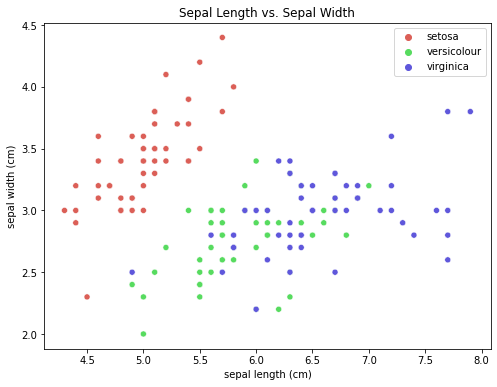

In [3]:
# Sepal Length vs Sepal Width
plt.figure(figsize=[8,6])
sns.scatterplot(
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue=df.target_names.tolist(),
    palette=sns.color_palette("hls", 3),
    data=df,
    ).set(title="Sepal Length vs. Sepal Width")


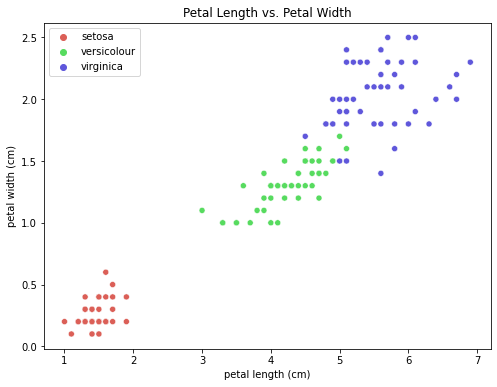

In [4]:
# Petal Length vs Petal Width
plt.figure(figsize=[8,6])
sns.scatterplot(
    x="petal length (cm)",
    y="petal width (cm)",
    hue=df.target_names.tolist(),
    palette=sns.color_palette("hls", 3),
    data=df,
    ).set(title="Petal Length vs. Petal Width")
plt.show()

## Principal Components Analysis (PCA)
Followed example from [scikit-learn.org](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html?highlight=iris)  
[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA)

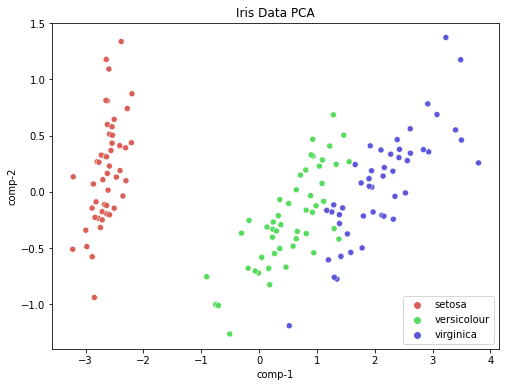

In [5]:
# Generate 3 components
X_reduced = PCA(n_components=3).fit_transform(X)

# Build Dataframe
df = pd.DataFrame()
df['comp-1'] = X_reduced[:,0]
df['comp-2'] = X_reduced[:,1]
df['comp-3'] = X_reduced[:,2]

# PCA Scatter Plot
plt.figure(figsize=[8,6])
sns.scatterplot(
    x="comp-1",
    y="comp-2",
    hue=target_names,
    palette=sns.color_palette("hls", 3),
    data=df,
    ).set(title="Iris Data PCA")
plt.show()

## Multidimensional Scaling (MDS)
Followed example from [towardsdatascience.com](https://towardsdatascience.com/visualize-multidimensional-datasets-with-mds-64d7b4c16eaa)  
[sklearn.manifold.MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html?highlight=multidimensional%20scaling)

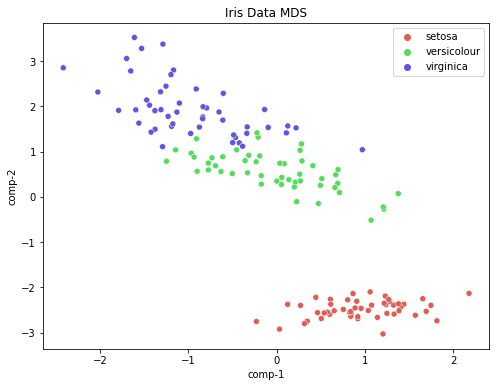

In [6]:
# Normalize Data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Generate 2 Dimensional Dataset
embedding = MDS(n_components=2, random_state=0)
X_transformed = embedding.fit_transform(X)

df = pd.DataFrame()
df['comp-1'] = X_transformed[:,0]
df['comp-2'] = X_transformed[:,1]

# PCA Scatter Plot
plt.figure(figsize=[8,6])
sns.scatterplot(
    x="comp-1",
    y="comp-2",
    hue=target_names,
    palette=sns.color_palette("hls", 3),
    data=df,
    ).set(title="Iris Data MDS")
plt.show()

## t-Distributed Stochastic Neighbor Embedding (t-SNE)
Followed example from [datatechnotes.com](https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html)  
[sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=multidimensional%20scaling)

/home/mbozada/projects/data-science/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mbozada/projects/data-science/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


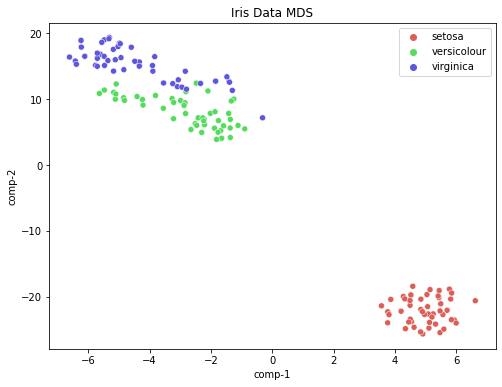

In [7]:
# Transform data
tsne = TSNE(n_components=2, random_state=314159)
X_transformed = tsne.fit_transform(X)

df = pd.DataFrame()
df['comp-1'] = X_transformed[:,0]
df['comp-2'] = X_transformed[:,1]

# PCA Scatter Plot
plt.figure(figsize=[8,6])
sns.scatterplot(
    x="comp-1",
    y="comp-2",
    hue=target_names,
    palette=sns.color_palette("hls", 3),
    data=df,
    ).set(title="Iris Data MDS")
plt.show()